In [11]:
import torch.optim as optim
import itertools
import seaborn as sns
import pandas as pd

from game import *
from replay_buffer import *
from policy_network import *
from reinforce import *

In [2]:
def learn(hype):
    env = Game(hype['Environment Name'])
    replay_buffer = ReplayBuffer(hype['Buffer']['Buffer Length'])
    policy_network = PolicyNetwork(env, hype['Policy Network']['Hidden Layer Width'])
    opt = optim.Adam(policy_network.logit.parameters(), lr=hype['Optimizer']['Learning Rate'])
    
    reward_past_few = []
    for i_iter in range(hype['Number of Steps']):
        trace_eps = env.play_episodes(policy_network.policy, n_eps=hype['Episodes per Step'])
        replay_buffer.absorb_trace(trace_eps)
        trace_summary = replay_buffer.emit_trace_as_grouped(hype['Discount'])
        
        reward_past_few.append(sum(trace_summary[2])/hype['Episodes per Step'])
        if not i_iter % hype['Log Every']:
            reward_run_avg = sum(reward_past_few)/len(reward_past_few)
            yield (i_iter, i_iter*hype['Episodes per Step'], reward_run_avg)
            if reward_run_avg > hype['Break at Reward']: break
            reward_past_few = []
        
        reinforce_mc_step(policy_network, trace_summary, hype['Regularization Parameter'], opt)

In [3]:
hype = {'Environment Name': 'CartPole-v0',
        'Policy Network': {'Hidden Layer Width': 128},
        'Buffer': {'Buffer Length': 1},
        'Optimizer': {'Learning Rate': 1e-3},
        'Episodes per Step': 1,
        'Number of Steps': 10000,
        'Regularization Parameter': 0.1,
        'Discount': 0.99,
        'Log Every': 100,
        'Break at Reward': 195}

perf_profile = []
for (s, e, r) in learn(hype):
    print('Steps: %4d,\tEpisodes: %4d,\tReward per Episode:%f' % (s, e, r))
    perf_profile.append((s,e,r))

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Steps:    0,	Episodes:    0,	Reward per Episode:12.000000


Steps:  100,	Episodes:  100,	Reward per Episode:24.020000


Steps:  200,	Episodes:  200,	Reward per Episode:36.240000


Steps:  300,	Episodes:  300,	Reward per Episode:55.430000


Steps:  400,	Episodes:  400,	Reward per Episode:74.480000


Steps:  500,	Episodes:  500,	Reward per Episode:123.000000


Steps:  600,	Episodes:  600,	Reward per Episode:137.990000


Steps:  700,	Episodes:  700,	Reward per Episode:144.290000


Steps:  800,	Episodes:  800,	Reward per Episode:121.920000


Steps:  900,	Episodes:  900,	Reward per Episode:145.830000


Steps: 1000,	Episodes: 1000,	Reward per Episode:171.980000


Steps: 1100,	Episodes: 1100,	Reward per Episode:185.950000


Steps: 1200,	Episodes: 1200,	Reward per Episode:191.750000


Steps: 1300,	Episodes: 1300,	Reward per Episode:189.330000


Steps: 1400,	Episodes: 1400,	Reward per Episode:135.330000


Steps: 1500,	Episodes: 1500,	Reward per Episode:140.060000


Steps: 1600,	Episodes: 1600,	Reward per Episode:154.180000


Steps: 1700,	Episodes: 1700,	Reward per Episode:157.020000


Steps: 1800,	Episodes: 1800,	Reward per Episode:127.250000


Steps: 1900,	Episodes: 1900,	Reward per Episode:155.890000


Steps: 2000,	Episodes: 2000,	Reward per Episode:188.180000


Steps: 2100,	Episodes: 2100,	Reward per Episode:117.630000


Steps: 2200,	Episodes: 2200,	Reward per Episode:172.050000


Steps: 2300,	Episodes: 2300,	Reward per Episode:182.240000


Steps: 2400,	Episodes: 2400,	Reward per Episode:176.420000


Steps: 2500,	Episodes: 2500,	Reward per Episode:176.210000


Steps: 2600,	Episodes: 2600,	Reward per Episode:148.650000


Steps: 2700,	Episodes: 2700,	Reward per Episode:145.860000


Steps: 2800,	Episodes: 2800,	Reward per Episode:191.720000


Steps: 2900,	Episodes: 2900,	Reward per Episode:193.590000


Steps: 3000,	Episodes: 3000,	Reward per Episode:143.830000


Steps: 3100,	Episodes: 3100,	Reward per Episode:126.590000


Steps: 3200,	Episodes: 3200,	Reward per Episode:156.920000


Steps: 3300,	Episodes: 3300,	Reward per Episode:183.530000


Steps: 3400,	Episodes: 3400,	Reward per Episode:191.580000


Steps: 3500,	Episodes: 3500,	Reward per Episode:198.460000


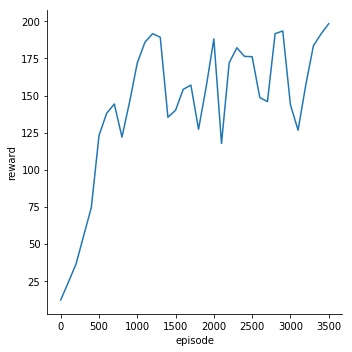

In [14]:
s, e, r = map(list, zip(*perf_profile))
df = pd.DataFrame(dict(episode=e, reward=r))
sns.relplot(x='episode', y='reward', data=df, kind='line')